# PHYS 434 Lab 1 - Angela Zhou

In [1]:
# import the libraries
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.pyplot import hist
import scipy
from scipy import stats
from scipy.stats import rayleigh
from scipy.stats import binom

#this sets the size of the plot 
plt.rcParams["figure.figsize"] = (15,10)

## A little statistics
### 1 B

In [2]:
# Integrate the standard normal distribution using stats.norm.cdf() in scipy
# convert sigma to probability
p1 = stats.norm.cdf(1) # cdf(sigma)
p2 = stats.norm.cdf(2.91)
p3 = stats.norm.cdf(5)

print("The probability corresponds to 1 sigma is " + str(p1) + ".")
print("The probability corresponds to 2.91 sigma is " + str(p2) + ".")
print("The probability corresponds to 5 sigma is " + str(p3) + ".")

The probability corresponds to 1 sigma is 0.8413447460685429.
The probability corresponds to 2.91 sigma is 0.9981928562191936.
The probability corresponds to 5 sigma is 0.9999997133484281.


The outputs above all matches the values from the z-table.

### 1 C

Now, we are doing the inverse of 1B; we are trying to determine the associated sigma value for a given probability.

In [3]:
# for a given probability determine the associated 'sigma' value
s1 = stats.norm.ppf(0.9981928562191936) # ppf(probability)
s2 = stats.norm.ppf(0.8413447460685429)
s3 = stats.norm.ppf(0.06057)

print("The associated 'sigma' value for 0.9981928562191936 probability is " + str(s1) + ".")
print("The associated 'sigma' value for 0.8413447460685429 probability is " + str(s2) + ".")
print("The associated 'sigma' value for 0.06057 probability is " + str(s3) + ".")

The associated 'sigma' value for 0.9981928562191936 probability is 2.910000000000009.
The associated 'sigma' value for 0.8413447460685429 probability is 1.0.
The associated 'sigma' value for 0.06057 probability is -1.550006316240991.


### 1 D

In the cell above, I performed percent point function, which is the inverse of cumulative distribution function on three different probability values. The third output value for "sigma" is negative. 
The meaning of negative sigma varies in different settings. <br>
For a gaussian distribution, the sigma value represents how many standard deviations our candidate is away from the mean. In this case, a negative sigma is just telling us that the candidate is below the mean by X standard deviations. <br>
I am using python, and I used stats.norm.cdf() in scipy in section 1B to calculate the probabilities correspond to some values of sigma. The way stats.norm.cdf() in scipy works is that it integrates the standard normal distribution from negative infinity to our candidate value, and stats.norm.ppf() is just the inverse of that. <br>
But when we convert a probability to sigma, what we want is that if we integrate the standard normal distribution from some sigma to positive infinity, we get a value that matches to the probability we had before. The sigma value that satisfies this condition will be the associated sigma for our probability. Therefore, if we want to get the correct probability using cdf(), we can either take 1-cdf(sigma) or we can do cdf(-sigma), and this is where the negative sigma comes in. 

### 2

Now I will explore some other continuous analytic distributions. I chose the Rayleigh distribution to complete this part of the lab. In the next few cells, I will make both the analytic pdf() and a realization with about 100k samples.<br>
The x axis shows different x values, and the y axis in the plots represents how frequent each x value appears in the dataset.

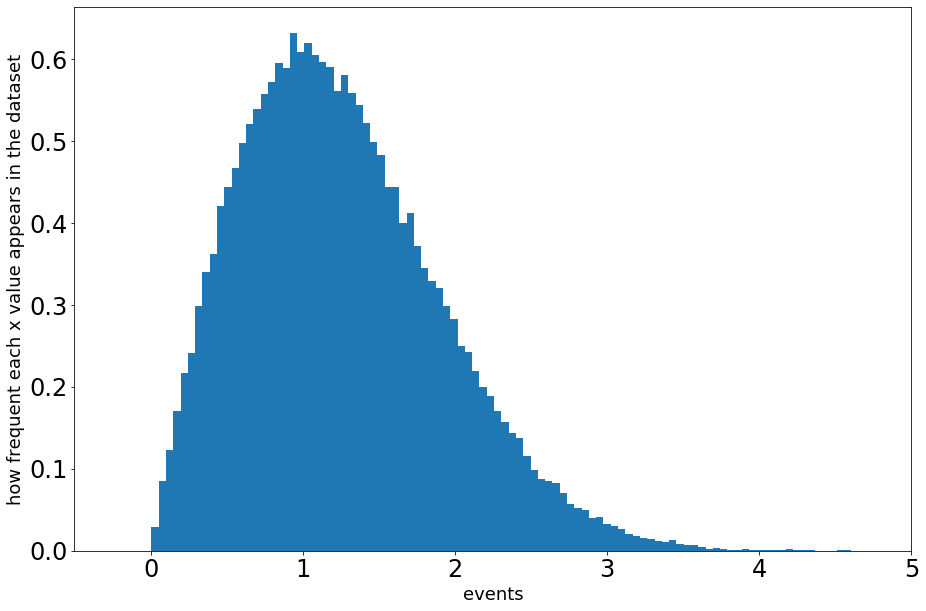

In [31]:
# create a Rayleigh distribution of 100k points using scipy
r = rayleigh.rvs(loc = 0, scale = 1, size = 100000) 

# plot a histogram of the Rayleigh distribution 
fig, ax = plt.subplots(1, 1) # create a figure
ax.hist(r, 100, density=True) # fill the figure with a hist & Rayleigh distribution r
plt.tick_params(labelsize = 24) # sets tick parameter for the plot, in this case, the label size
plt.xlim([-0.5,5]) # sets rage for x axis
ax.set_xlabel("events",fontsize = 18)
ax.set_ylabel("how frequent each x value appears in the dataset", fontsize = 18)
plt.show()

The plot above is what my Rayleigh distribution looks like. This is a Rayleigh distribution with scale = 10, size = 100000. <br>
In the following cell, I will plot the probability density function of my Rayleigh distribution with an orange curve.<br>
In both plots, 

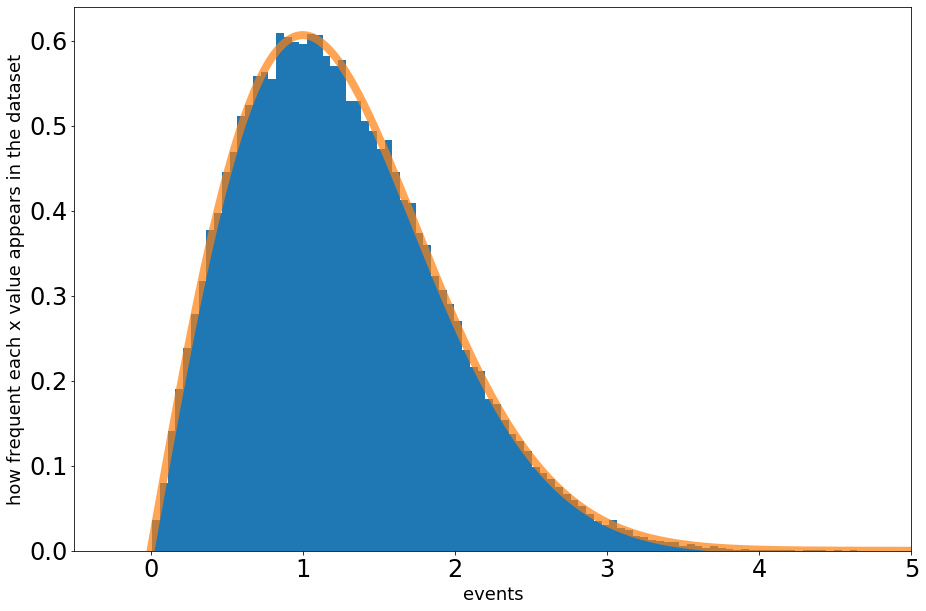

In [28]:
fig, ax = plt.subplots(1, 1) # create a figure
ax.hist(r, 100, density=True) # fill the figure with a hist & Rayleigh distribution r
plt.tick_params(labelsize = 24) # sets tick parameter for the plot, in this case, the label size
plt.xlim([-0.5,5]) # sets rage for x axis
x = np.linspace(0,5,1000) # create an array for x values with numpy that contains equally spaced 1000 points between -0.5 and 5
ax.plot(x, rayleigh.pdf(x, 0, 1), linewidth = 8,alpha = 0.7) 
ax.set_xlabel("events",fontsize = 18)
ax.set_ylabel("how frequent each x value appears in the dataset", fontsize = 18)
plt.show()

### 3 A

Suppose the Rayleigh distribution plotted above is my signal-free data. I choose the value when x = 2.5 for my hypothetical measurement. 

### 3 B

The statistical question I want to ask in words is: If there was no signal, and the signal-free data has a Rayleigh distribution (null-hypothesis), what is the probability that the data produces a signal that is equally or more signal-like than what I observed?

### 3 C

Now I want to convert the statistical question in section A 3 B into a mathematical integral. 
To find the probability asked in A 3 B, we need to integrate the probability density function of the Rayleigh distribution from our candidate x = 2.5 to positive infinity.

### 3 D

The code in the next cell uses the survival function, which is defined as 1 - the cumulative distribution function(cdf), to calculate the probability that the background produced the signal. <br>
The cumulative distribution function takes the integral from negative infinity to our candidate. As I mentioned in the previous section, we want to integrate the probability density function of the Rayleigh distribution from our candidate x = 2.5 to positive infinity. Therefore, the survival function, 1 - the cumulative distribution function, will give us the correct value of probability.

In [6]:
pr = rayleigh.sf(2.5, 0, 1) # sf() is the survival function, it is defined as 1 - cdf
print("The probability that the background produced the signal at x = 2.5 is "+ str(pr) + ", \n" +
        "and it is calculated by integrating the Rayleigh distribution from the candidate x = 2.5 to positive infinity.")

The probability that the background produced the signal at x = 2.5 is 0.04393693362340742, 
and it is calculated by integrating the Rayleigh distribution from the candidate x = 2.5 to positive infinity.


### 3 E

Now I will convert this probability into an equivalent 'sigma' using the percent point function which is the inverse of cdf.

In [7]:
sr = stats.norm.ppf(pr) # ppf() is the percent point function which is the inverse of cdf
print("The equivalent 'sigma' of probability = 0.04393693362340742 is " + str(sr) + ".")

The equivalent 'sigma' of probability = 0.04393693362340742 is -1.7067212947438692.


### 4

I will try various hypothetical measurement values below(x1 = 0.5; x2 = 1.5; x3 = 3.5) and see how the probabilities and 'sigmas' change.<br>
Depending on where my hypothetical measurement values are in the distribution, I use cdf() or sf() to calculate the probability correspond to each hypothetical measurement value.

In [55]:
x1 = 0.5
pr1 = rayleigh.cdf(x1, 0, 1) # 0.5 is to the left of the max value in my Rayleigh distribution, so more signal like at x = 0.5 means to the left of 0.5 -> using cdf() to integrate from negative infinity to 0.5
sr1 = stats.norm.ppf(pr1)
print("The probability that the background produced the signal at x = " + str(x1) + " is " + str(pr1) + ",") 
print("    and it is calculated by integrating the Rayleigh distribution from negative infinity to x = " + str(x1) + ".")
print("Because x = " + str(x1) + " is to the left side of the most probable x value in this Rayleigh distribution, \n" + 
      "    more signal like for a candidate at x = " + str(x1) +" means to the left of x = " + str(x1) + ".")
print("The equivalent 'sigma' for this probability is " + str(sr1) + ".")
print()

x2 = 1
pr2 = rayleigh.sf(x2, 0, 1) # sf() is the survival function, it is defined as 1 - cdf
sr2 = stats.norm.ppf(pr2)
print("The probability that the background produced the signal at x = " + str(x2) + " is " + str(pr2) + ",")
print("    and it equals to the integral from x = " + str(x2) + " to positive infinity.")
print("X = " + str(x2) + " is very close to the most probable x value in this Rayleigh distribution,\n" + 
      "    but it is still to the right side of it, \n" + 
      "    so more signal like for a candidate at x = " + str(x2) +" means to the right of x = " + str(x2) + ".")
print("The equivalent 'sigma' for this probability is " + str(sr2) + ".")
print()

x3 = 3.5
pr3 = rayleigh.sf(x3, 0, 1) # sf() is the survival function, it is defined as 1 - cdf
sr3 = stats.norm.ppf(pr3)
print("The probability that the background produced the signal at x = " + str(x3) + " is " + str(pr3) + ",")
print("    and it equals to the integral from x = " + str(x3) + " to positive infinity.")
print("Because x = " + str(x3) + " is to the right side of the most probable x value in this Rayleigh distribution, \n" + 
      "    more signal like for a candidate at x = " + str(x3) +" means to the right of x = " + str(x3) + ".")
print("The equivalent 'sigma' for this probability is " + str(sr3) + ".")
print()


The probability that the background produced the signal at x = 0.5 is 0.1175030974154046,
    and it is calculated by integrating the Rayleigh distribution from negative infinity to x = 0.5.
Because x = 0.5 is to the left side of the most probable x value in this Rayleigh distribution, 
    more signal like for a candidate at x = 0.5 means to the left of x = 0.5.
The equivalent 'sigma' for this probability is -1.1875615473802972.

The probability that the background produced the signal at x = 1 is 0.6065306597126334,
    and it equals to the integral from x = 1 to positive infinity.
X = 1 is very close to the most probable x value in this Rayleigh distribution,
    but it is still to the right side of it, 
    so more signal like for a candidate at x = 1 means to the right of x = 1.
The equivalent 'sigma' for this probability is 0.27028802073873587.

The probability that the background produced the signal at x = 3.5 is 0.002187491118182885,
    and it equals to the integral from x = 3.

We've computed the probabilities and sigmas at 4 different x values for our Rayleigh distribution. From looking at the outputs and comparing the values, we can see that the sigma values correspond to probabilities that are less than 0.5 are negative, and the sigma value correspond to a probability that is greater than 0.5 is positive. 

## Non-continuous distributions

### 1 A

The two most common non-continuous distributions are the Binomial distribution and the Poisson distribution. I will study the Binomial distribution for this part of the lab. 

### 1 B

In this section, I will make plots of three Binomial distributions with different parameters, and explain the features of the plots. <br>
The x axis shows different x values, and the y axis shows the probability of having x events over n trials if the probility of success is p.

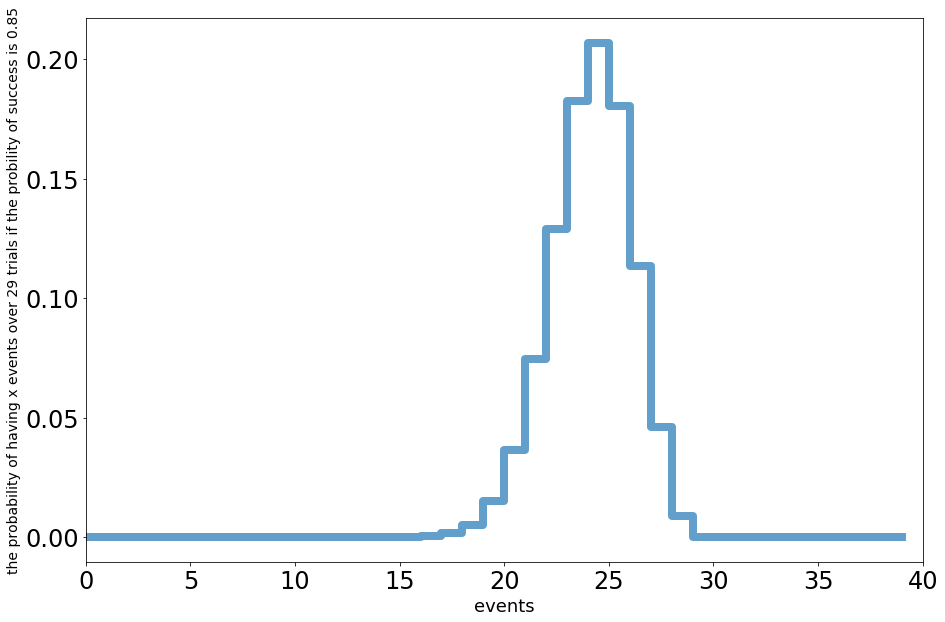

In [39]:
# create the first non-continuous distribution of 1000 points using scipy
n1 = 29 # n is the number of trials
p1 = 0.85 # p is the probability of success
b1 = binom.rvs(n1, p1, loc = 0, size = 100, random_state=None) # create a set of random varibles of Binomial distribution
xb1 = range(0,40) # sets discrete x values for the histogram and step plot

fig, ax = plt.subplots(1, 1) # create a figure
# ax.hist(b1, 100, density=True) # fill the figure with a hist & binomial distribution b1
plt.tick_params(labelsize = 24) # sets tick parameter for the plot, in this case, the label size
plt.xlim([0,40]) # sets rage for x axis
ax.step(xb1,binom.pmf(xb1,n1,p1), linewidth = 8,alpha = 0.7) 
ax.set_xlabel("events",fontsize = 18)
ax.set_ylabel("the probability of having x events over " + str(n1) + " trials if the probility of success is " + str(p1), fontsize = 14)
plt.show()

This is the first Binomial distribution plot with n = 29, and p = 0.85.

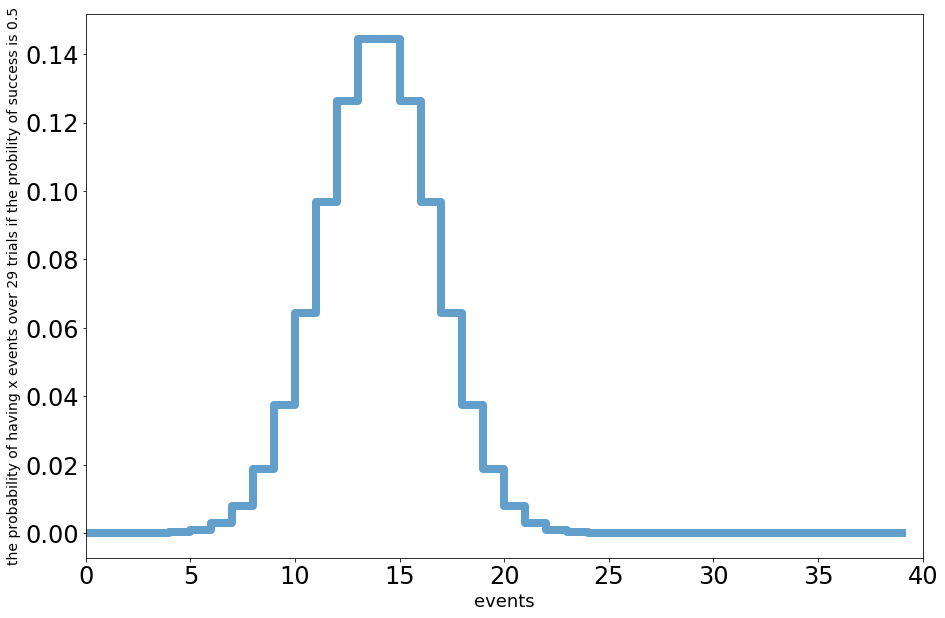

In [40]:
# create the second non-continuous distribution of 1000 points using scipy
n2 = 29 # n is the number of trials, same with n1
p2 = 0.5 # p is the probability of success, different from p1
b2 = binom.rvs(n2, p2, loc = 0, size = 100, random_state = None)
 
fig, ax = plt.subplots(1, 1) # create a figure
# ax.hist(b2, 100, density=True) # fill the figure with a hist & binomial distribution b2
plt.tick_params(labelsize = 24) # sets tick parameter for the plot, in this case, the label size
plt.xlim([0,40]) # sets rage for x axis
xb2 = range(0,40) 
ax.step(xb2,binom.pmf(xb2,n2,p2), linewidth = 8,alpha = 0.7) 
ax.set_xlabel("events",fontsize = 18)
ax.set_ylabel("the probability of having x events over " + str(n2) + " trials if the probility of success is " + str(p2), fontsize = 14)
plt.show()

This is the second Binomial distribution plot with n = 20, and p = 0.5.

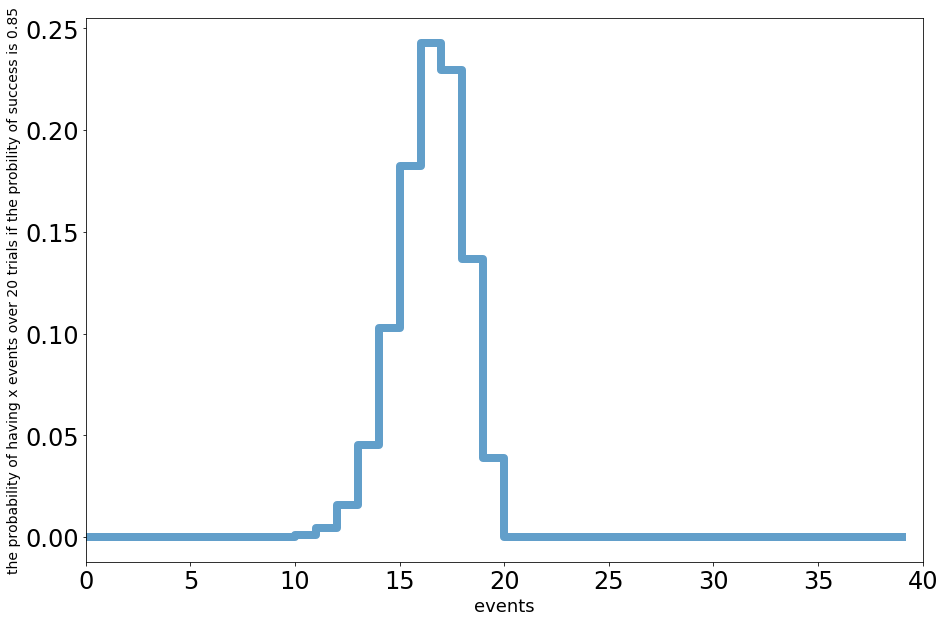

In [41]:
# create the third non-continuous distribution of 1000 points using scipy
n3 = 20 # n is the number of trials, different from n3
p3 = 0.85 # p is the probability of success, same with p1
b3 = binom.rvs(n3, p3, loc =0, size =100, random_state = None)
 
fig, ax = plt.subplots(1, 1) # create a figure
# ax.hist(b3, 100, density=True) # fill the figure with a hist & binomial distribution b2
plt.tick_params(labelsize = 24) # sets tick parameter for the plot, in this case, the label size
plt.xlim([0,40]) # sets rage for x axis
xb3 = range(0,40) 
ax.step(xb3,binom.pmf(xb3,n3,p3), linewidth = 8,alpha = 0.7) 
ax.set_xlabel("events",fontsize = 18)
ax.set_ylabel("the probability of having x events over " + str(n3) + " trials if the probility of success is " + str(p3), fontsize = 14)
plt.show()

This is the third Binomial distribution plot with n = 20, and p = 0.85. <br>

The first Binomial distribution b1 and the second Binomial distribution b2 have the same n value, but different p values. And the first Binomial distribution b1 and the third Binomial distribution b3 have the same p value, but different n values.<br>
Comparing b1 and b2 we can see that a higher p parameter will make the mean of the distribution closer to the value of n. And comparing b1 and b3 we can see with the same p parameter, a different n parameter changes where most of the data is distributed. <br>

### 1 C

My hypothetical question is: If there was no signal, and the signal-free data has a Binomial distribution (null-hypothesis), what is the probability that the data produces a signal that is equally or more signal-like than what I observed? <br>
I choose my candidate to be when x = 15 for all three Binomial distributions, and I will calculate the corresponding probability for each distribution. 

In [51]:
k = 15 # my candiate for this section

# calculate the probability for b1
pb1 = binom.cdf(k,n1,p1) # 15 is to the left of the max value in the Binomial distribution b1, so more signal like at x = 15 means to the left of 15 -> use cdf()
print("The probability that the background produced the signal at x = " + str(k) + " for Binomial distribution b1 \n    is " + str(pb1) + 
      ", and it is the integral from negative infinity to x = " + str(k) + ".")
print("X = " + str(k) + " is to the left side of the most probable x value in Binomial distribution b1, \n" +
      "    so more signal like for a candidate at x = " + str(k) +" in Binomial distribution b1 means to the left of x = " + str(k) + ".")
print()

# calculate the probability for b2
pb2 = binom.sf(k,n2,p2) # 15 is to the right of the max value in the Binomial distribution b2, so more signal like at x = 15 means to the right of 15 -> use sf()
print("The probability that the background produced the signal at x = " + str(k) + " for Binomial distribution b2 \n    is " + str(pb2) + 
      ", and it equals to the integral from x = " + str(k) + " to positive infinity.")
print("X = " + str(k) + " is to the right side of the most probable x value in Binomial distribution b2, \n" +
      "    so more signal like for a candidate at x = " + str(k) +" in Binomial distribution b2 means to the right of x = " + str(k) + ".")
print()

# calculate the probability for b3
pb3 = binom.sf(k,n3,p3) # 15 is to the right of the left value in the Binomial distribution b3, so more signal like at x = 15 means to the left of 15 -> use cdf()
print("The probability that the background produced the signal at x = " + str(k) + " for Binomial distribution b3 \n    is " + str(pb3) + 
      ", and it is the integral from negative infinity to x = " + str(k) + ".")
print("X = " + str(k) + " is to the left side of the most probable x value in Binomial distribution b3, \n" +
      "    so more signal like for a candidate at x = " + str(k) +" in Binomial distribution b3 means to the left of x = " + str(k) + ".")


The probability that the background produced the signal at x = 15 for Binomial distribution b1 
    is 2.3889960400964246e-05, and it is the integral from negative infinity to x = 15.
X = 15 is to the left side of the most probable x value in Binomial distribution b1, 
    so more signal like for a candidate at x = 15 in Binomial distribution b1 means to the left of x = 15.

The probability that the background produced the signal at x = 15 for Binomial distribution b2 
    is 0.35553555190563196, and it equals to the integral from x = 15 to positive infinity.
X = 15 is to the right side of the most probable x value in Binomial distribution b2, 
    so more signal like for a candidate at x = 15 in Binomial distribution b2 means to the right of x = 15.

The probability that the background produced the signal at x = 15 for Binomial distribution b3 
    is 0.8298468462686538, and it is the integral from negative infinity to x = 15.
X = 15 is to the left side of the most probable x value in

### 1 D

Because the distributions are discrete, the probabilities and 'sigmas' are also discrete. The gaps between different probabilities are larger compared to those in continuous distributions. If we use this type of distribution in experiments, we won't be able to find a specific probability or sigma associated to any random x value. X values that are close to each other may have a same probability or sigma. And sometimes a x value we choose may fall between two probabilites, then we need to choose the one that makes more sense for the experiment.

### 1 E

The results of Non-continuous distributions are discrete, but the parameters of the distributions are not. <br>
Some parameters changes continuously and the x values, probabilities, and sigmas don't change continuously. <br>
Parameters have effect on the mean of distributions, and the mean can be anywhere between the range of the minimum x value and the maximum value. But the probability and sigma are associated with each unique x value. Since the x values are discrete, the probabilities and sigmas should also be discrete.